# U.S. Medical Insurance Costs

In [122]:
import csv
import numpy as np

from matplotlib import pyplot as plt

In [28]:
insurance_df = list()

# load csv file
with open('insurance.csv') as insurance_csv:
    insurance_df_raw = csv.DictReader(insurance_csv)


    for row in insurance_df_raw:
        row["age"] = int(row["age"])
        row["bmi"] = float(row["bmi"])
        row["children"] = int(row["children"])
        row["smoker"] = True if row["smoker"] == "yes" else False
        row["charges"] = float(row["charges"])

        insurance_df.append(row)

        print(row)

total_clients = len(insurance_df)

{'age': 19, 'sex': 'female', 'bmi': 27.9, 'children': 0, 'smoker': True, 'region': 'southwest', 'charges': 16884.924}
{'age': 18, 'sex': 'male', 'bmi': 33.77, 'children': 1, 'smoker': False, 'region': 'southeast', 'charges': 1725.5523}
{'age': 28, 'sex': 'male', 'bmi': 33.0, 'children': 3, 'smoker': False, 'region': 'southeast', 'charges': 4449.462}
{'age': 33, 'sex': 'male', 'bmi': 22.705, 'children': 0, 'smoker': False, 'region': 'northwest', 'charges': 21984.47061}
{'age': 32, 'sex': 'male', 'bmi': 28.88, 'children': 0, 'smoker': False, 'region': 'northwest', 'charges': 3866.8552}
{'age': 31, 'sex': 'female', 'bmi': 25.74, 'children': 0, 'smoker': False, 'region': 'southeast', 'charges': 3756.6216}
{'age': 46, 'sex': 'female', 'bmi': 33.44, 'children': 1, 'smoker': False, 'region': 'southeast', 'charges': 8240.5896}
{'age': 37, 'sex': 'female', 'bmi': 27.74, 'children': 3, 'smoker': False, 'region': 'northwest', 'charges': 7281.5056}
{'age': 37, 'sex': 'male', 'bmi': 29.83, 'childre

In [29]:
# find average cost for all
insurance_cost_total = 0

for row in insurance_df:
    insurance_cost_total += row["charges"]

insurance_cost_average = insurance_cost_total / total_clients

print(f"Average insurance cost: ${round(insurance_cost_average, 2)}")

Average insurance cost: $13270.42


------------------------------------------------------------
Total clients: 1338
Male: 676 (50.52%), Female: 662 (49.48%)


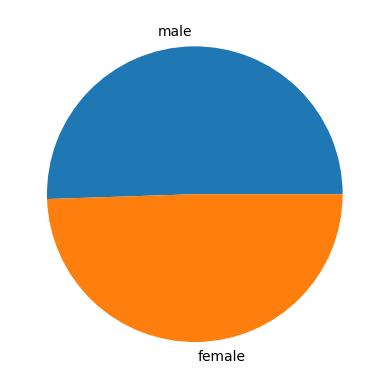

------------------------------------------------------------
Average cost for male clients:		$13956.75
Average cost for female clients:	$12569.58


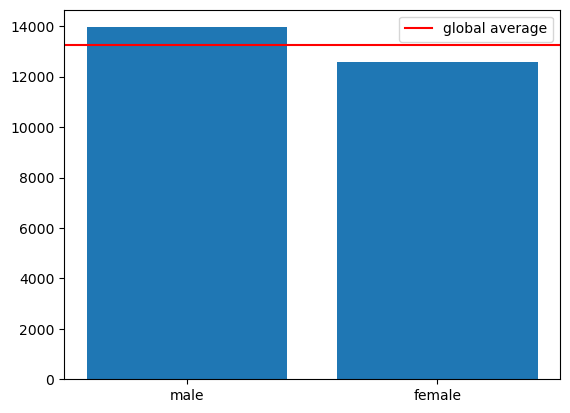

------------------------------------------------------------


In [123]:
# find average cost for male compared to female people
insurance_cost_male_total = 0
insurance_cost_female_total = 0
male_count = 0

for row in insurance_df:
    if row["sex"] == "male":
        insurance_cost_male_total += row["charges"]
        male_count += 1
        continue

    insurance_cost_female_total += row["charges"]

female_count = total_clients - male_count

insurance_cost_male_avg = insurance_cost_male_total / male_count
insurance_cost_female_avg = insurance_cost_female_total / (total_clients - male_count)

print("-" * 60)
print(f"Total clients: {total_clients}")
print(f"Male: {male_count} ({round((male_count * 100 / total_clients), 2)}%), Female: {female_count} ({round((female_count * 100 / total_clients), 2)}%)")
plt.pie([round((male_count * 100 / total_clients), 2), round((female_count * 100 / total_clients), 2)], labels=["male", "female"])
plt.show()
print("-" * 60)
print(f"Average cost for male clients:\t\t${round(insurance_cost_male_avg, 2)}")
print(f"Average cost for female clients:\t${round(insurance_cost_female_avg, 2)}")
plt.bar(["male", "female"], [insurance_cost_male_avg, insurance_cost_female_avg])
plt.axhline(insurance_cost_average, color="red", label="global average")
plt.legend(loc="upper right")
plt.show()
print("-" * 60)

------------------------------------------------------------
Total clients: 1338
Smokers: 274 (20.48%), Non-Smokers: 1064 (79.52%)


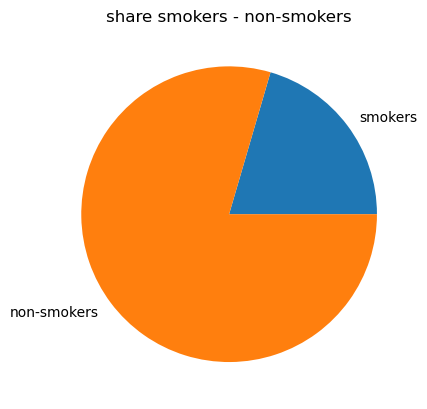

------------------------------------------------------------
Average cost for smokers:		$32050.23	(141.52% compared to global average)
Average cost for non-smokers:	$8434.27	(-36.44% compared to global average, -73.68% compared to smokers)


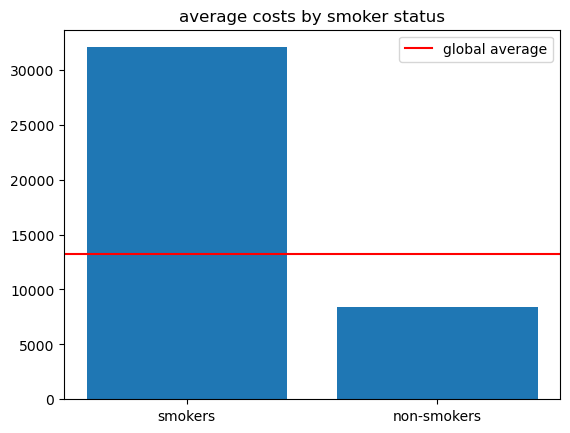

------------------------------------------------------------


In [128]:
# find average cost for non-smokers compared to smokers
insurance_cost_smoker_total = 0
insurance_cost_nonsmoker_total = 0

smoker_count = 0

for row in insurance_df:
    if row["smoker"]:
        insurance_cost_smoker_total += row["charges"]
        smoker_count += 1
        continue

    insurance_cost_nonsmoker_total += row["charges"]

nonsmoker_count = total_clients - smoker_count

share_smokers = round((smoker_count * 100 / total_clients), 2)
share_nonsmokers = round((nonsmoker_count * 100 / total_clients), 2)

insurance_cost_smoker_avg = insurance_cost_smoker_total / smoker_count
insurance_cost_nonsmoker_avg = insurance_cost_nonsmoker_total / nonsmoker_count

print("-" * 60)
print(f"Total clients: {total_clients}")
print(f"Smokers: {smoker_count} ({share_smokers}%), Non-Smokers: {nonsmoker_count} ({share_nonsmokers}%)")
plt.pie([share_smokers, share_nonsmokers], labels=["smokers", "non-smokers"])
plt.title("share smokers - non-smokers")
plt.show()
print("-" * 60)
print(f"Average cost for smokers:\t\t${round(insurance_cost_smoker_avg, 2)}\t({round(((insurance_cost_smoker_avg - insurance_cost_average) * 100 / insurance_cost_average), 2)}% compared to global average)")
print(f"Average cost for non-smokers:\t${round(insurance_cost_nonsmoker_avg, 2)}\t({round(((insurance_cost_nonsmoker_avg - insurance_cost_average) * 100 / insurance_cost_average), 2)}% compared to global average, {round(((insurance_cost_nonsmoker_avg - insurance_cost_smoker_avg) * 100 / insurance_cost_smoker_avg), 2)}% compared to smokers)")
plt.bar(["smokers", "non-smokers"], [insurance_cost_smoker_avg, insurance_cost_nonsmoker_avg])
plt.axhline(y=insurance_cost_average, color="red", label="global average")
plt.legend(loc="upper right")
plt.title("average costs by smoker status")
plt.show()
print("-" * 60)

------------------------------------------------------------
Average BMI (global):		30.66
Average BMI of smokers:		30.71
Average BMI of non-smokers:	30.65


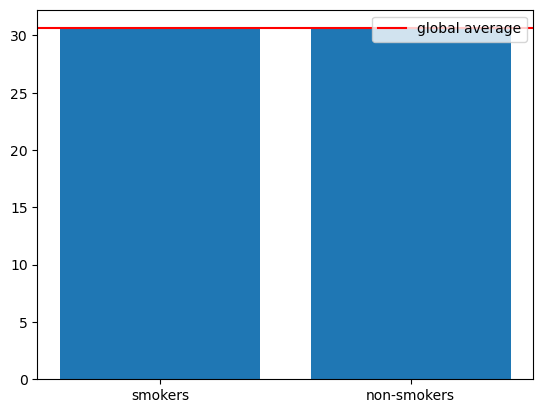

------------------------------------------------------------


In [87]:
# find average bmi of non-smokers compared to smokers
# is there a correlation between smoker status and bmi?
bmi_smokers_total = 0
bmi_non_smokers_total = 0
bmi_total = 0

for row in insurance_df:
    bmi_total += row["bmi"]

    if row["smoker"]:
        bmi_smokers_total += row["bmi"]
        continue

    bmi_non_smokers_total += row["bmi"]

bmi_smokers_avg = bmi_smokers_total / smoker_count
bmi_nonsmokers_avg = bmi_non_smokers_total / nonsmoker_count
bmi_average = bmi_total / total_clients

print("-" * 60)
print(f"Average BMI (global):\t\t{round(bmi_average, 2)}")
print(f"Average BMI of smokers:\t\t{round(bmi_smokers_avg, 2)}")
print(f"Average BMI of non-smokers:\t{round(bmi_nonsmokers_avg, 2)}")
plt.bar(["smokers", "non-smokers"], [bmi_smokers_avg, bmi_nonsmokers_avg])
plt.axhline(y=bmi_average, color="red", label="global average")
plt.legend(loc="upper right")
plt.show()
print("-" * 60)

------------------------------------------------------------


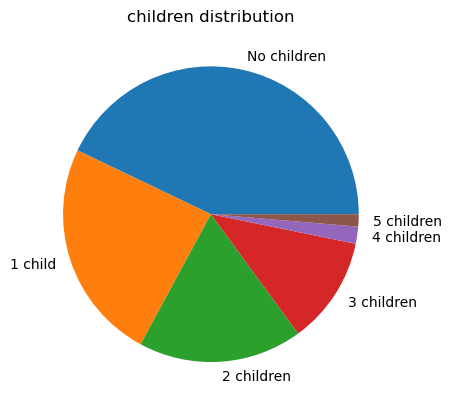

------------------------------------------------------------


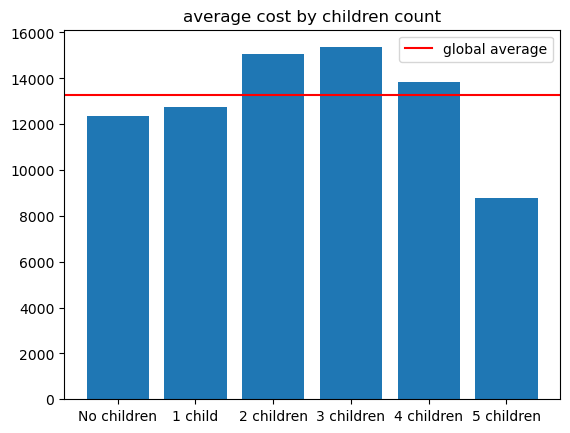

------------------------------------------------------------


In [126]:
# find average cost for children count
# in general, do clients with more children have higher costs?
min_children = 0
max_children = 0

for row in insurance_df:
    if row["children"] > max_children:
        max_children = row["children"]

children_range = list(range(min_children, max_children + 1))

insurance_cost_per_children_count = dict()  # Entry structure: [count, total_cost]

for row in insurance_df:
    if row["children"] not in insurance_cost_per_children_count:
        insurance_cost_per_children_count[row["children"]] = [0, 0]

    insurance_cost_per_children_count[row["children"]][0] += 1
    insurance_cost_per_children_count[row["children"]][1] += row["charges"]

# print(insurance_cost_per_children_count)

insurance_cost_no_children = round((insurance_cost_per_children_count[0][1] / insurance_cost_per_children_count[0][0]), 2)
insurance_cost_1_child = round((insurance_cost_per_children_count[1][1] / insurance_cost_per_children_count[1][0]), 2)
insurance_cost_2_children = round((insurance_cost_per_children_count[2][1] / insurance_cost_per_children_count[2][0]), 2)
insurance_cost_3_children = round((insurance_cost_per_children_count[3][1] / insurance_cost_per_children_count[3][0]), 2)
insurance_cost_4_children = round((insurance_cost_per_children_count[4][1] / insurance_cost_per_children_count[4][0]), 2)
insurance_cost_5_children = round((insurance_cost_per_children_count[5][1] / insurance_cost_per_children_count[5][0]), 2)

label = ["No children", "1 child", "2 children", "3 children", "4 children", "5 children"]

print("-" * 60)
plt.pie([insurance_cost_per_children_count[0][0], insurance_cost_per_children_count[1][0], insurance_cost_per_children_count[2][0], insurance_cost_per_children_count[3][0], insurance_cost_per_children_count[4][0], insurance_cost_per_children_count[5][0]], labels=label)
plt.title("children distribution")
plt.show()
print("-" * 60)
plt.bar(label, [insurance_cost_no_children, insurance_cost_1_child, insurance_cost_2_children, insurance_cost_3_children, insurance_cost_4_children, insurance_cost_5_children])
plt.axhline(insurance_cost_average, color="red", label="global average")
plt.legend(loc="upper right")
plt.title("average cost by children count")
plt.show()
print("-" * 60)

------------------------------------------------------------
Average cost ages < 20:		$8407.35
Average cost ages 20 - 30:	$9561.75
Average cost ages 30 - 40:	$11738.78
Average cost ages 40 - 50:	$14399.2
Average cost ages 50 - 60:	$16495.23
Average cost ages > 60:		$21248.02


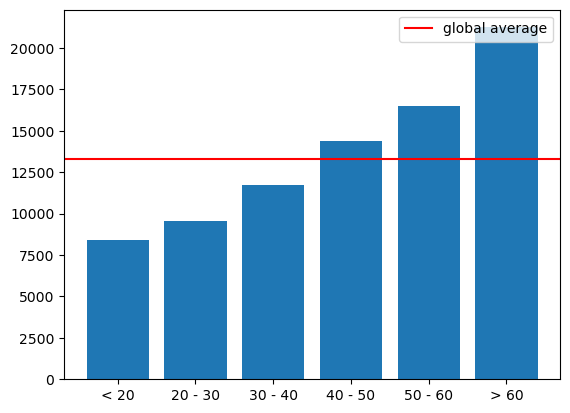

------------------------------------------------------------


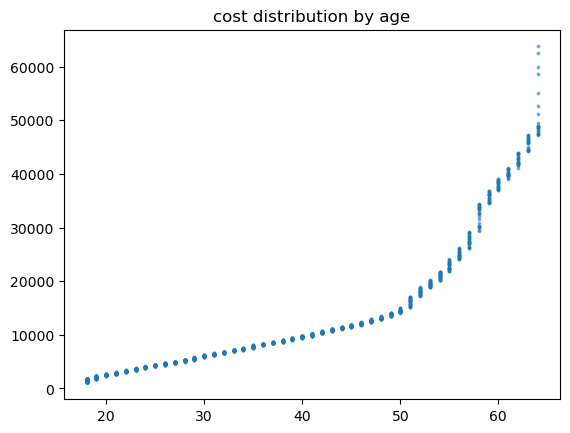

------------------------------------------------------------


In [124]:
# scatter plot age-cost
# do costs rise with the higher the age of the client?
ages = np.array([])
costs = np.array([])

insurance_cost_by_age = {0: [0, 0], 20: [0, 0], 30: [0, 0], 40: [0, 0], 50: [0, 0], 60: [0, 0]}  # Entry structure: [count, total]

for row in insurance_df:
    ages = np.append(ages, row["age"])
    costs = np.append(costs, row["charges"])

    if row["age"] < 20:
        insurance_cost_by_age[0][0] += 1
        insurance_cost_by_age[0][1] += row["charges"]

    if 20 <= row["age"] < 30:
        insurance_cost_by_age[20][0] += 1
        insurance_cost_by_age[20][1] += row["charges"]

    if 30 <= row["age"] < 40:
        insurance_cost_by_age[30][0] += 1
        insurance_cost_by_age[30][1] += row["charges"]

    if 40 <= row["age"] < 50:
        insurance_cost_by_age[40][0] += 1
        insurance_cost_by_age[40][1] += row["charges"]

    if 50 <= row["age"] < 60:
        insurance_cost_by_age[50][0] += 1
        insurance_cost_by_age[50][1] += row["charges"]

    if row["age"] >= 60:
        insurance_cost_by_age[60][0] += 1
        insurance_cost_by_age[60][1] += row["charges"]

ages.sort()
costs.sort()

avg_0_20 = round((insurance_cost_by_age[0][1] / insurance_cost_by_age[0][0]), 2)
avg_20_30 = round((insurance_cost_by_age[20][1] / insurance_cost_by_age[20][0]), 2)
avg_30_40 = round((insurance_cost_by_age[30][1] / insurance_cost_by_age[30][0]), 2)
avg_40_50 = round((insurance_cost_by_age[40][1] / insurance_cost_by_age[40][0]), 2)
avg_50_60 = round((insurance_cost_by_age[50][1] / insurance_cost_by_age[50][0]), 2)
avg_60 = round((insurance_cost_by_age[60][1] / insurance_cost_by_age[60][0]), 2)


print("-" * 60)
print(f"Average cost ages < 20:\t\t${avg_0_20}")
print(f"Average cost ages 20 - 30:\t${avg_20_30}")
print(f"Average cost ages 30 - 40:\t${avg_30_40}")
print(f"Average cost ages 40 - 50:\t${avg_40_50}")
print(f"Average cost ages 50 - 60:\t${avg_50_60}")
print(f"Average cost ages > 60:\t\t${avg_60}")
plt.bar(["< 20", "20 - 30", "30 - 40", "40 - 50", "50 - 60", "> 60"], [avg_0_20, avg_20_30, avg_30_40, avg_40_50, avg_50_60, avg_60])
plt.axhline(insurance_cost_average, color="red", label="global average")
plt.legend(loc="upper right")
plt.show()
# bar chart
print("-" * 60)
plt.scatter(ages, costs, s=3, alpha=0.5)
plt.title("cost distribution by age")
plt.show()
print("-" * 60)